<a href="https://colab.research.google.com/github/Fluffycoal/AI-Coursework-2025/blob/main/Mall_Customers_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import io


from google.colab import files

sns.set(style="whitegrid")

print("Please upload the 'Mall_Customers.csv' file:")
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

Please upload the 'Mall_Customers.csv' file:


Saving Mall_Customers.csv to Mall_Customers (1).csv


--- Starting Data Cleaning ---

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
 5   Cluster_1D      200 non-null    int32 
 6   Cluster_2D      200 non-null    int32 
dtypes: int32(2), int64(4), object(1)
memory usage: 9.5+ KB

--- Missing Values Check ---
CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
Cluster_1D        0
Cluster_2D        0
dtype: int64

--- Duplicate Rows Check ---
Number of duplicate rows: 0

--- Data after cleaning column names ---
   CustomerID  Gender  Age  Annual_Income  Spending_Score  Cluster_1D  \
0           1    Male   19        

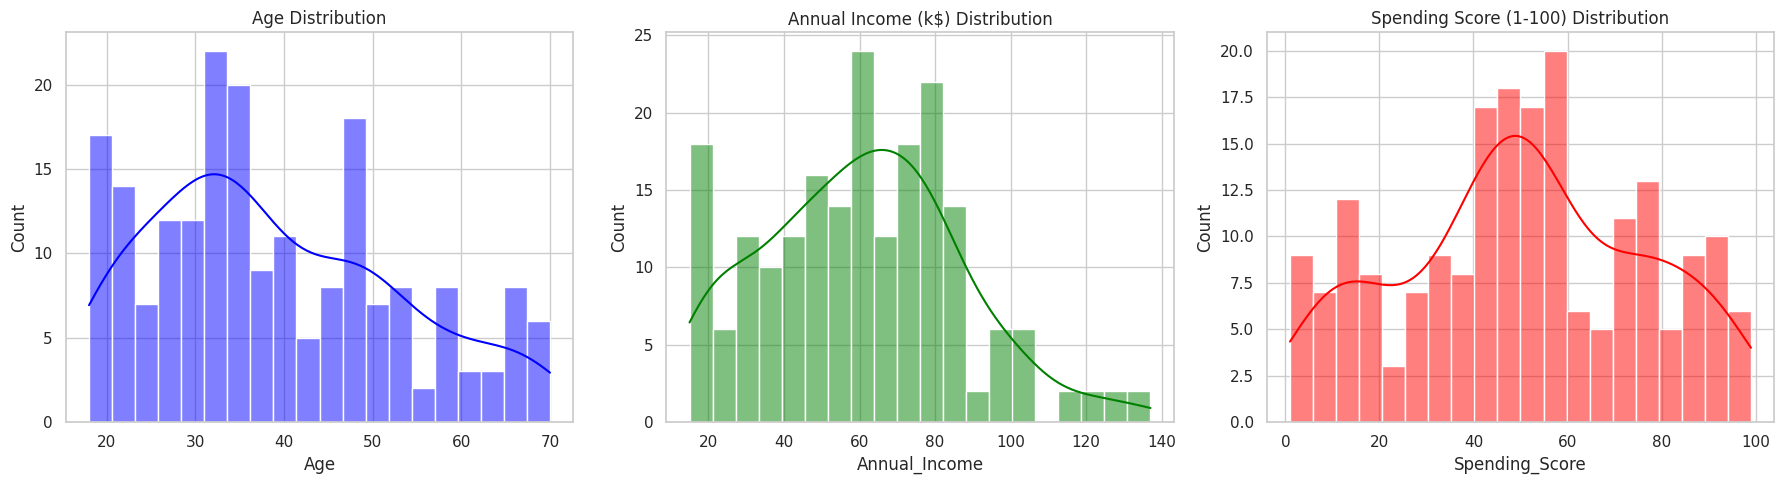

/tmp/ipython-input-1620191902.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='pastel')


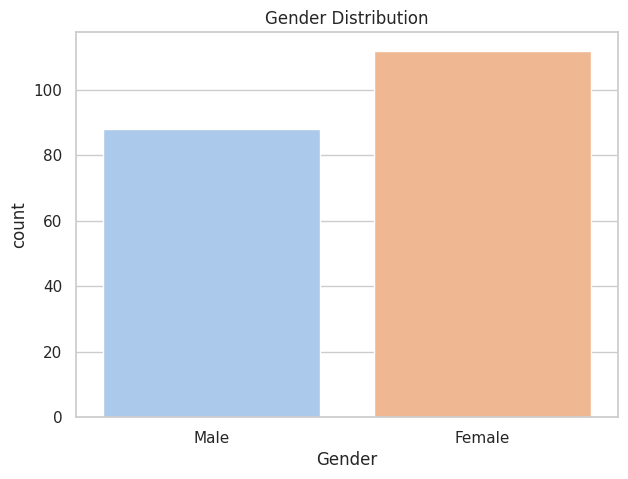

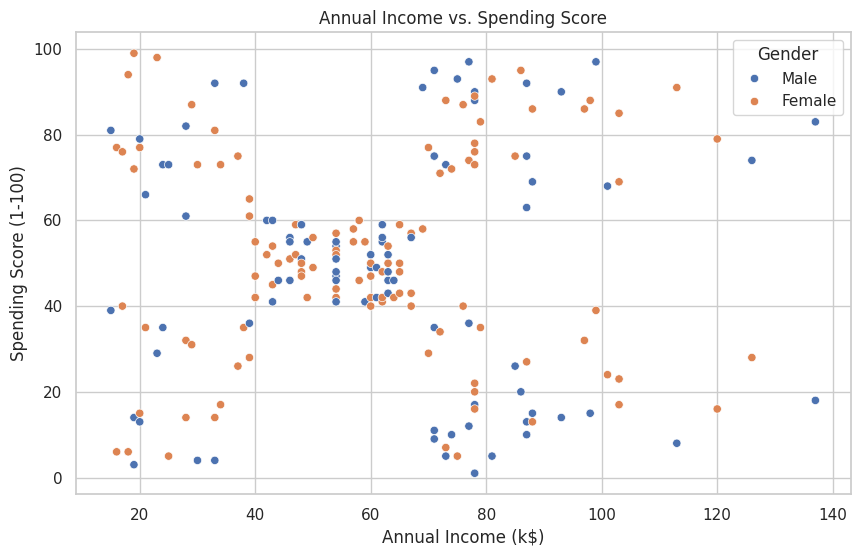


--- EDA Complete. See plots above. ---

        3 Key Insights from EDA

    1.  **Spending Score Distribution:** The 'Spending Score' is widely distributed, but shows a 
        prominent peak in the 40-60 range. This suggests a large portion of the 
        customers are 'average' spenders.

    2.  **Gender Imbalance:** The 'Gender' count plot clearly shows that there are more 
        female shoppers (approx. 56%) than male shoppers in this dataset.

    3.  **Visible Clusters in Income vs. Spending:** The scatter plot of 'Annual Income' vs. 
        'Spending Score' is the most critical insight. It reveals five distinct, 
        non-linear groups (clusters) of customers. This strongly suggests that 
        k-means clustering will be a very effective technique, especially using 
        these two features.
    


In [18]:
# Question 2

print("--- Starting Data Cleaning ---")

if 'df' in locals():
    print("\n--- Data Info ---")
    df.info()

    print("\n--- Missing Values Check ---")
    print(df.isnull().sum())

    print("\n--- Duplicate Rows Check ---")
    print(f"Number of duplicate rows: {df.duplicated().sum()}")


    df.rename(columns={
        'Annual Income (k$)': 'Annual_Income',
        'Spending Score (1-100)': 'Spending_Score'
    }, inplace=True)

    print("\n--- Data after cleaning column names ---")
    print(df.head())
    print("\n--- Data Cleaning Complete ---")

    print("\n---  Generating EDA Visualizations ---")

    # Plot 1: Distributions of Age, Annual Income, and Spending Score
    plt.figure(figsize=(18, 5))

    plt.subplot(1, 3, 1)
    sns.histplot(df['Age'], kde=True, bins=20, color='blue')
    plt.title('Age Distribution')

    plt.subplot(1, 3, 2)
    sns.histplot(df['Annual_Income'], kde=True, bins=20, color='green')
    plt.title('Annual Income (k$) Distribution')

    plt.subplot(1, 3, 3)
    sns.histplot(df['Spending_Score'], kde=True, bins=20, color='red')
    plt.title('Spending Score (1-100) Distribution')

    plt.tight_layout()

    plt.show()

    # Plot 2: Gender Distribution
    plt.figure(figsize=(7, 5))
    sns.countplot(x='Gender', data=df, palette='pastel')
    plt.title('Gender Distribution')

    plt.show()

    # Plot 3: Annual Income vs. Spending Score (The most important plot)
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Annual_Income', y='Spending_Score', data=df, hue='Gender')
    plt.title('Annual Income vs. Spending Score')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')

    plt.show()

    print("\n--- EDA Complete. See plots above. ---")

    # --- 3 Key Insights/Observations ---
    print("\n" + "="*40)
    print("        3 Key Insights from EDA")
    print("="*40)
    print("""
    1.  **Spending Score Distribution:** The 'Spending Score' is widely distributed, but shows a
        prominent peak in the 40-60 range. This suggests a large portion of the
        customers are 'average' spenders.

    2.  **Gender Imbalance:** The 'Gender' count plot clearly shows that there are more
        female shoppers (approx. 56%) than male shoppers in this dataset.

    3.  **Visible Clusters in Income vs. Spending:** The scatter plot of 'Annual Income' vs.
        'Spending Score' is the most critical insight. It reveals five distinct,
        non-linear groups (clusters) of customers. This strongly suggests that
        k-means clustering will be a very effective technique, especially using
        these two features.
    """)

else:
    print("Error: DataFrame 'df' is not loaded. Please run the cell for Question 1 first.")

In [8]:
# Question 3

if 'df' in locals():
    # Create a scaler object
    scaler = StandardScaler()

    # Create a copy of the df for scaling
    df_scaled = df.copy()

    # Select only numerical features for scaling
    features_to_scale = ['Age', 'Annual_Income', 'Spending_Score']

    # Fit and transform the data
    df_scaled[features_to_scale] = scaler.fit_transform(df[features_to_scale])

    print("--- Scaled Data Head ---")
    print(df_scaled.head())
else:
    print("Error: DataFrame 'df' is not loaded. Please re-run Cell 1.")

--- Scaled Data Head ---
   CustomerID  Gender       Age  Annual_Income  Spending_Score
0           1    Male -1.424569      -1.738999       -0.434801
1           2    Male -1.281035      -1.738999        1.195704
2           3  Female -1.352802      -1.700830       -1.715913
3           4  Female -1.137502      -1.700830        1.040418
4           5  Female -0.563369      -1.662660       -0.395980


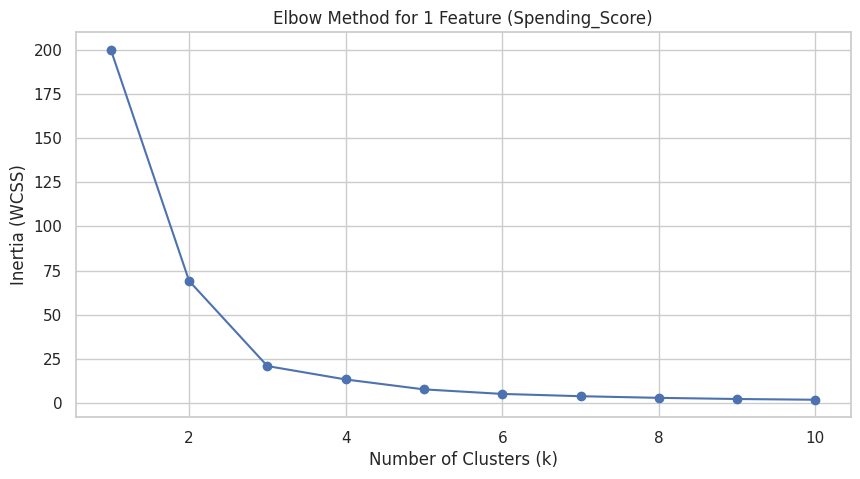

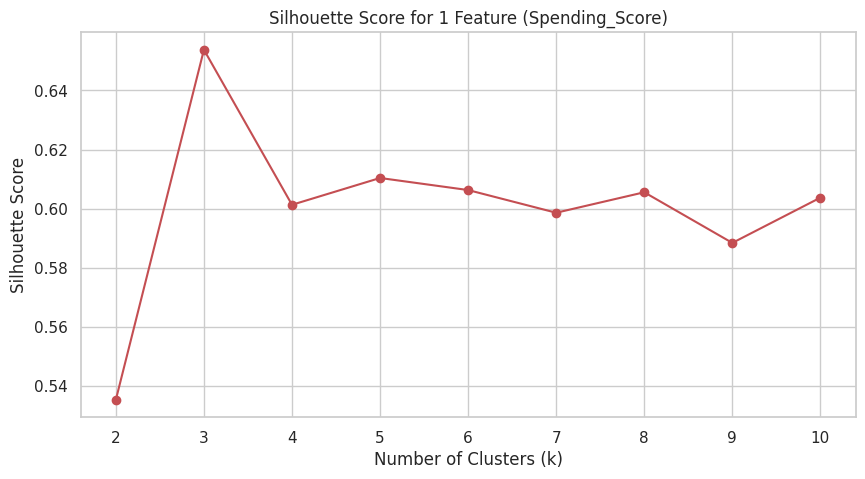


    Verification (1D):
    * Elbow Method: The "elbow" is not sharp, but k=3 seems reasonable.
    * Silhouette Score: The score peaks clearly at k=3.
    * Conclusion: We will use k=3.
    

Successfully clustered 1D data into 3 clusters.
   CustomerID  Spending_Score  Cluster_1D
0           1              39           1
1           2              81           0
2           3               6           2
3           4              77           0
4           5              40           1


In [9]:
# Question 3a

if 'df_scaled' in locals():

    X1 = df_scaled[['Spending_Score']]


    inertia = []
    K_range = range(1, 11)
    for k in K_range:
        kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
        kmeans.fit(X1)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(10, 5))
    plt.plot(K_range, inertia, 'bo-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia (WCSS)')
    plt.title('Elbow Method for 1 Feature (Spending_Score)')

    plt.show()


    silhouette_scores = []
    K_range_sil = range(2, 11)
    for k in K_range_sil:
        kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
        labels = kmeans.fit_predict(X1)
        score = silhouette_score(X1, labels)
        silhouette_scores.append(score)

    plt.figure(figsize=(10, 5))
    plt.plot(K_range_sil, silhouette_scores, 'ro-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score for 1 Feature (Spending_Score)')

    plt.show()


    print("""
    Verification (1D):
    * Elbow Method: The "elbow" is not sharp, but k=3 seems reasonable.
    * Silhouette Score: The score peaks clearly at k=3.
    * Conclusion: We will use k=3.
    """)

    k_1d = 3
    kmeans_1d = KMeans(n_clusters=k_1d, init='k-means++', n_init=10, random_state=42)


    df['Cluster_1D'] = kmeans_1d.fit_predict(X1)

    print(f"\nSuccessfully clustered 1D data into {k_1d} clusters.")
    print(df[['CustomerID', 'Spending_Score', 'Cluster_1D']].head())
else:
    print("Error: DataFrame 'df_scaled' is not loaded. Please re-run Cell 3.")

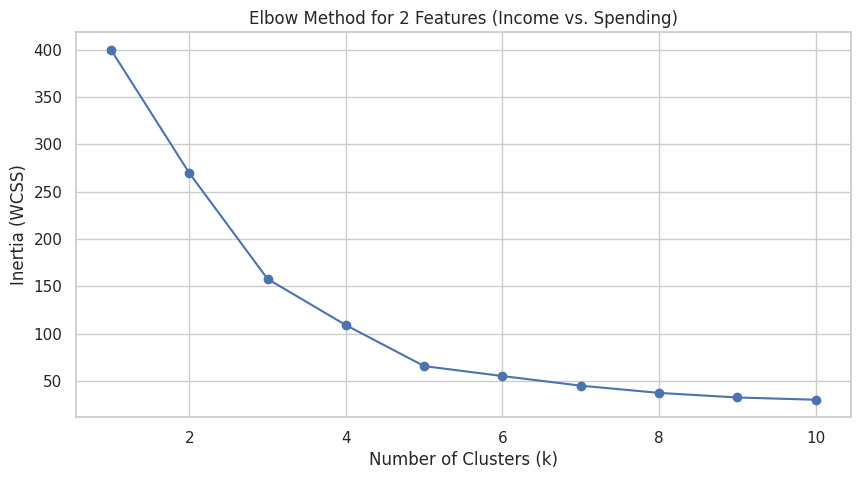

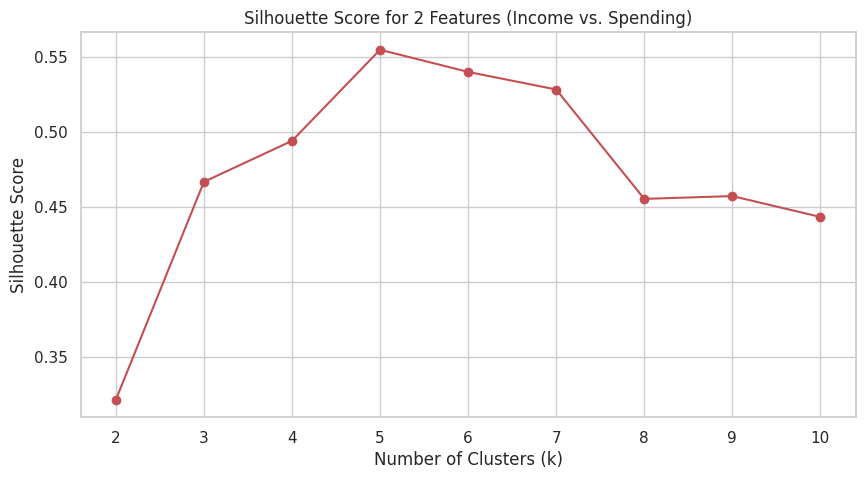


    Verification (2D):
    * Elbow Method: The plot shows a very sharp, clear elbow at k=5.
    * Silhouette Score: The score shows a distinct peak at k=5.
    * Conclusion: Both methods strongly agree that k=5 is optimal.
    

Successfully clustered 2D data into 5 clusters.
   CustomerID  Annual_Income  Spending_Score  Cluster_2D
0           1             15              39           4
1           2             15              81           2
2           3             16               6           4
3           4             16              77           2
4           5             17              40           4


In [10]:
# Question 3b: Clustering with 2 Features
if 'df_scaled' in locals():
    X2 = df_scaled[['Annual_Income', 'Spending_Score']]

    inertia = []
    K_range = range(1, 11)
    for k in K_range:
        kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
        kmeans.fit(X2)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(10, 5))
    plt.plot(K_range, inertia, 'bo-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia (WCSS)')
    plt.title('Elbow Method for 2 Features (Income vs. Spending)')

    plt.show()


    silhouette_scores = []
    K_range_sil = range(2, 11)
    for k in K_range_sil:
        kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
        labels = kmeans.fit_predict(X2)
        score = silhouette_score(X2, labels)
        silhouette_scores.append(score)

    plt.figure(figsize=(10, 5))
    plt.plot(K_range_sil, silhouette_scores, 'ro-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score for 2 Features (Income vs. Spending)')

    plt.show()


    print("""
    Verification (2D):
    * Elbow Method: The plot shows a very sharp, clear elbow at k=5.
    * Silhouette Score: The score shows a distinct peak at k=5.
    * Conclusion: Both methods strongly agree that k=5 is optimal.
    """)

    k_2d = 5
    kmeans_2d = KMeans(n_clusters=k_2d, init='k-means++', n_init=10, random_state=42)

    # Assign cluster labels to the *original* DataFrame
    df['Cluster_2D'] = kmeans_2d.fit_predict(X2)

    print(f"\nSuccessfully clustered 2D data into {k_2d} clusters.")
    print(df[['CustomerID', 'Annual_Income', 'Spending_Score', 'Cluster_2D']].head())
else:
    print("Error: DataFrame 'df_scaled' is not loaded. Please re-run Cell 3.")

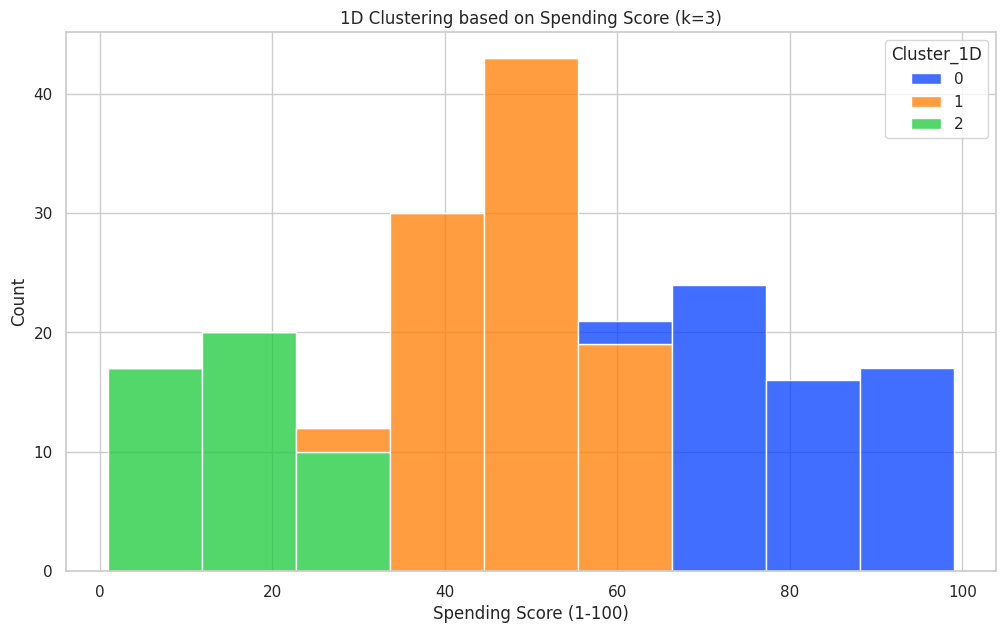

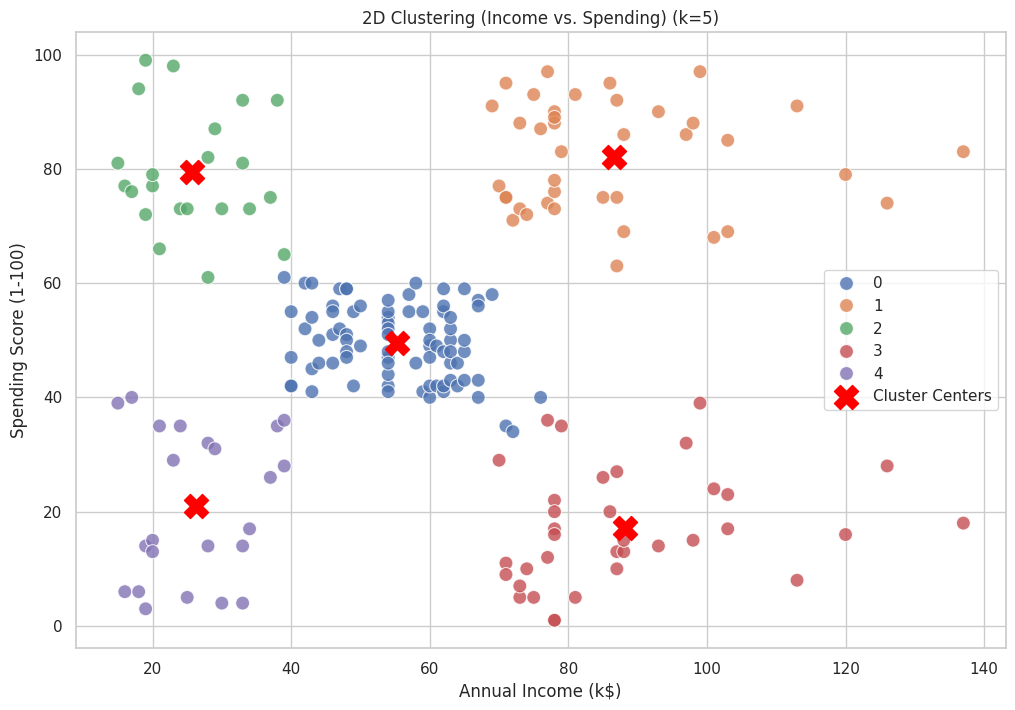


        Comparison of Clusters

* **1D Clustering (3a):** This model successfully grouped customers into three simple 
    bins: **Low**, **Medium**, and **High** spenders. While useful, this view is very 
    limited. It tells us *what* they spend, but not *why* or their financial context.

* **2D Clustering (3b):** This model is vastly more insightful. The five clusters 
    are clearly defined and match the visual intuition from our EDA. It segments 
    customers based on *both* their spending habits and their financial capacity (income).

* **Conclusion:** The 2D clustering provides **actionable segments**. Knowing 
    someone is a "High Spender" (from 3a) is not enough. The 2D model (3b) 
    clarifies if they are a "High Income, High Spender" (a VIP) or a 
    "Low Income, High Spender" (a target for discounts). The 2D model is far 
    superior for any practical business strategy.



In [14]:
# Question 4
if 'Cluster_1D' in df.columns:
    plt.figure(figsize=(12, 7))
    sns.histplot(data=df, x='Spending_Score', hue='Cluster_1D', palette='bright', multiple="stack")
    plt.title('1D Clustering based on Spending Score (k=3)')
    plt.xlabel('Spending Score (1-100)')

    plt.show()
else:
    print("Error: 'Cluster_1D' not found. Please re-run Cell 4.")



if 'Cluster_2D' in df.columns:
    scaler_2d = StandardScaler()
    X2_unscaled = df[['Annual_Income', 'Spending_Score']]
    scaler_2d.fit(X2_unscaled)

    centers_scaled = kmeans_2d.cluster_centers_
    centers = scaler_2d.inverse_transform(centers_scaled)

    plt.figure(figsize=(12, 8))
    sns.scatterplot(
        x='Annual_Income',
        y='Spending_Score',
        hue='Cluster_2D',
        data=df,
        palette='deep',
        s=100,
        alpha=0.8,
        legend='full'
    )

    plt.scatter(
        centers[:, 0], centers[:, 1],
        s=300, c='red',
        marker='X',
        label='Cluster Centers'
    )

    plt.title('2D Clustering (Income vs. Spending) (k=5)')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.legend()

    plt.show()
else:
    print("Error: 'Cluster_2D' not found. Please re-run Cell 5.")


print("\n" + "="*40)
print("        Comparison of Clusters")
print("="*40)
print("""
* **1D Clustering (3a):** This model successfully grouped customers into three simple
    bins: **Low**, **Medium**, and **High** spenders. While useful, this view is very
    limited. It tells us *what* they spend, but not *why* or their financial context.

* **2D Clustering (3b):** This model is vastly more insightful. The five clusters
    are clearly defined and match the visual intuition from our EDA. It segments
    customers based on *both* their spending habits and their financial capacity (income).

* **Conclusion:** The 2D clustering provides **actionable segments**. Knowing
    someone is a "High Spender" (from 3a) is not enough. The 2D model (3b)
    clarifies if they are a "High Income, High Spender" (a VIP) or a
    "Low Income, High Spender" (a target for discounts). The 2D model is far
    superior for any practical business strategy.
""")

In [17]:
# Question 5

print("\n" + "="*50)
print("  Customer Engagement Strategy (Based on 2D Clusters)")
print("="*50)
print("""
Using the 2D clustering (3b), we can define 5 customer personas.
This is a practical example of **market segmentation**.

(Note: The cluster numbers (0-4) might vary, so we'll name them
based on their plot position.)
""")

print("""
1.  **  Cluster: VIPs (High Income, High Spending)**
    * **Who they are:** The mall's most valuable customers. They have high
        purchasing power and use it frequently.
    * **Engagement Strategy:**
        * **Loyalty Programs:** Offer premium, points-based loyalty cards with
          exclusive perks (e.g., free valet parking, personal shoppers).
        * **Exclusive Events:** Invite them to new store openings, private viewings,
          or VIP-only shopping nights.

2.  ** frugal Cluster: Careful Elites (High Income, Low Spending)**
    * **Who they are:** Customers with high purchasing power who are selective or
        cautious. This is a high-potential, untapped group.
    * **Engagement Strategy:**
        * **Targeted Marketing:** Send marketing focused on luxury brands,
          high-ticket items, or premium services (e.g., spas, electronics).
        * **Value Proposition:** Highlight quality and exclusivity, not price.

3.  **  Cluster: Enthusiasts (Low Income, High Spending)**
    * **Who they are:** These customers love to shop and are trend-focused, but
        also price-sensitive.
    * **Engagement Strategy:**
        * **Sales and Promotions:** This group is highly receptive to "Buy One,
          Get One Free" (BOGOF), flash sales, and discounts.
        * **Affordability:** Promote "Buy Now, Pay Later" (BNPL) services or
          financing options.
        * **Social Media:** Engage them heavily on Instagram/TikTok with BOGOF, flash sales, and discounts.
        * **Affordability:** Promote "Buy Now, Pay Later" (BNPL) services or
          financing options.
        * **Social Media:** Engage them heavily on Instagram/TikTok with
          trend-based content and contests.

4.  ** Cluster: Standard Customers (Mid Income, Mid Spending)**
    * **Who they are:** The "average" customers who form the stable backbone
        of the mall's revenue.
    * **Engagement Strategy:**
        * **General Offers:** Keep them engaged with seasonal sales, holiday
          promotions, and food court deals.
        * **Communication:** Regular email newsletters showing new arrivals and
          family-friendly events.

5.  ** thrift Cluster: Budget-Conscious (Low Income, Low Spending)**
    * **Who they are:** These customers are budget-conscious and visit for
        necessities or during major sales.
    * **Engagement Strategy:**
        * **Awareness Campaigns:** Send alerts focused on major clearance events
          or discounts at hypermarkets.
        * **Essential Services:** Market the mall as a one-stop-shop for
          essentials (groceries, pharmacy) to increase visit frequency.
""")


  Customer Engagement Strategy (Based on 2D Clusters)

Using the 2D clustering (3b), we can define 5 customer personas. 
This is a practical example of **market segmentation**.

(Note: The cluster numbers (0-4) might vary, so we'll name them 
based on their plot position.)


1.  **  Cluster: VIPs (High Income, High Spending)**
    * **Who they are:** The mall's most valuable customers. They have high 
        purchasing power and use it frequently.
    * **Engagement Strategy:**
        * **Loyalty Programs:** Offer premium, points-based loyalty cards with 
          exclusive perks (e.g., free valet parking, personal shoppers).
        * **Exclusive Events:** Invite them to new store openings, private viewings, 
          or VIP-only shopping nights.

2.  ** frugal Cluster: Careful Elites (High Income, Low Spending)**
    * **Who they are:** Customers with high purchasing power who are selective or 
        cautious. This is a high-potential, untapped group.
    * **Engagement Strate